# Circle analysis w/ 110 steps

* TransAccel=0

* TransParam=0 

In [21]:
import pandas as pd
import glob
import os 
import matplotlib.pyplot as plt

In [86]:
def GenericFormattingColumns(df):
    colNames = df.columns
    colNames = [c.replace('-', '_') for c in colNames]
    colNames = [c.replace(' ', '') for c in colNames]
    colNames = [c.strip() for c in colNames]
    df.columns = colNames
    print(df.columns)
    df.index = range(len(df))
    return df

In [87]:
dfs = list()
for file in glob.glob('./Jump7/*_TrajData.txt'):
    name = os.path.basename(file)
    name = os.path.splitext(name)[0]
    print(name)
    df=pd.read_csv(file,'|')
    GenericFormattingColumns(df)
    dfs.append(df)

Group_TrajData
Index(['TimeStamp(usec)', 'Action', 'PathNum', 'CurveNum', 'CurveType',
       'LengthInCurve', 'Velocity', 'Accel', 'TimeDiff(sec)', 'Unnamed:9'],
      dtype='object')
X_TrajData
Index(['TimeStamp(usec)', 'Position', 'Velocity', 'Accel', 'TimeDiff(sec)',
       'Unnamed:5'],
      dtype='object')
Y_TrajData
Index(['TimeStamp(usec)', 'Position', 'Velocity', 'Accel', 'TimeDiff(sec)',
       'Unnamed:5'],
      dtype='object')


Con todos debo plotear :
TimeStamp/Velocity *1000

In [88]:
#Pasar las listas a Dataframes nuevamente
dfs_Traj=dfs[0]
df_Traj= pd.DataFrame(dfs_Traj)

df_Traj.loc[:,'TimeStamp(usec)']=df_Traj.loc[:,'TimeStamp(usec)'].div(1000)


dfs_X=dfs[1]
df_X= pd.DataFrame(dfs_X)
df_X.loc[:,'TimeStamp(usec)']=df_X.loc[:,'TimeStamp(usec)'].div(1000)


dfs_Y=dfs[2]
df_Y= pd.DataFrame(dfs_Y)
df_Y.loc[:,'TimeStamp(usec)']=df_Y.loc[:,'TimeStamp(usec)'].div(1000)


In [89]:
df=pd.read_csv('./Tool_Circle_xdb/Circle_110Sections_T0.nc.Tool.xdb',delimiter='|', index_col=0,usecols=[0,1,6,12])
df.head(15)


,Command,CurveType,Velocity
Action,,,
1,1,------,0.0000
2,2,------,0.0000
3,3,------,0.0000
4,6,------,0.0000
5,7,LINEAR,10.0000
6,8,------,0.0000
7,16,LINEAR,200.0000
8,17,CORNER,12.3938
9,17,LINEAR,200.0000


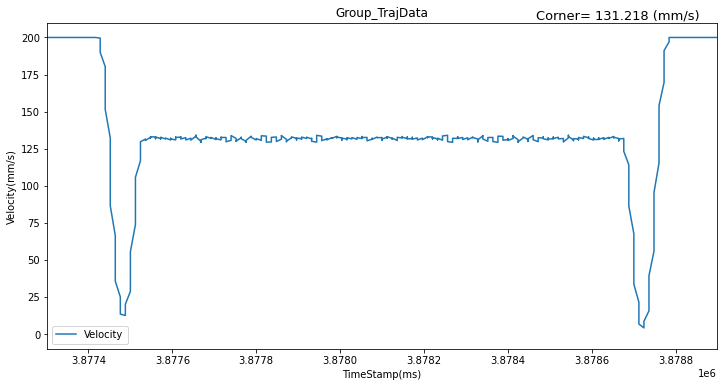

In [91]:
fig=plt.figure(figsize=[12,6])
axes1=fig.add_subplot(1,1,1)
#axes2=fig.add_subplot(1,3,2)
#axes3=fig.add_subplot(1,3,3)

Total = max(df_Traj['TimeStamp(usec)']) - min(df_Traj['TimeStamp(usec)'])
x_min = min(df_Traj['TimeStamp(usec)']) + round(0.35*Total)
x_max = max(df_Traj['TimeStamp(usec)']) - round(0.27*Total)
x_limits = [x_min, x_max]
axes1.set_title('Group_TrajData')
df_Traj.plot(ax=axes1 ,x='TimeStamp(usec)',y='Velocity',xlim=x_limits,xlabel='TimeStamp(ms)',ylabel='Velocity(mm/s)')
axes1.text(0.73,1.01,f'Corner= {round(df.iloc[11,2],5)} (mm/s)',fontsize=13,transform=axes1.transAxes)

#axes2.set_title('X')
#df_X.plot(ax=axes2 ,x='TimeStamp(usec)',y='Velocity',xlim=x_limits,xlabel='TimeStamp(ms)',ylabel='Velocity(mm/s)')


#axes3.set_title('Y')
#df_Y.plot(ax=axes3 ,x='TimeStamp(usec)',y='Velocity',xlim=x_limits,xlabel='TimeStamp(ms)',ylabel='Velocity(mm/s)')

plt.savefig('Circle_Steps_110_Corner.png')